In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = '/content/drive/MyDrive/data_stand.csv'
data = pd.read_csv(path)

data.shape

(1431, 11)

In [3]:
data.head()

,평균기온,일강수량,평균풍속,최다풍향,평균현지기압,평균전운량,베이징PM2.5,베이징PM10,교통량,화력발전량,미세먼지
0,0.963266,-0.267740,-1.126942,-0.946219,-0.738590,0.608248,1.140874,0.620564,1.287904,-0.427073,0.456948
1,0.405473,-0.267740,0.558985,-1.548068,0.233002,-0.640583,0.958178,1.840345,1.227601,-0.922350,-0.503110
2,0.513117,0.946836,-0.737882,-1.548068,-0.495692,1.166935,0.633385,2.722740,-0.673777,-1.038422,-0.534080
3,0.385901,0.321686,0.948045,0.618588,-0.896473,-0.969223,1.303270,1.061761,1.213395,-0.565692,0.023373
4,0.503331,-0.267740,0.429298,0.137109,-0.762879,-1.297863,1.222072,0.620564,1.319340,-0.450406,1.386037


In [4]:
data.dtypes

평균기온        float64
일강수량        float64
평균풍속        float64
최다풍향        float64
평균현지기압      float64
평균전운량       float64
베이징PM2.5    float64
베이징PM10     float64
교통량         float64
화력발전량       float64
미세먼지        float64
dtype: object

In [5]:
data.isnull().sum()

평균기온        0
일강수량        0
평균풍속        0
최다풍향        0
평균현지기압      0
평균전운량       0
베이징PM2.5    0
베이징PM10     0
교통량         0
화력발전량       0
미세먼지        0
dtype: int64

In [6]:
#KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 정답과 학습 데이터 분리
X = data.drop('미세먼지', axis=1)
y = data['미세먼지']

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K 값 범위 설정
k_values = [5, 10, 20, 30, 40, 50]

for k in k_values:
    # KNN 모델 생성 및 학습
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # 예측
    y_pred = knn.predict(X_test)

    # 성능 평가
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"K = {k}")
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2):", r2)
    print("----------------------")


K = 5
Mean Squared Error (MSE): 0.553188898547169
R-squared (R2): 0.38881166017010305
----------------------
K = 10
Mean Squared Error (MSE): 0.5248448109821559
R-squared (R2): 0.4201275015912709
----------------------
K = 20
Mean Squared Error (MSE): 0.5498812222294182
R-squared (R2): 0.3924661319114018
----------------------
K = 30
Mean Squared Error (MSE): 0.5677030683346493
R-squared (R2): 0.3727757430363412
----------------------
K = 40
Mean Squared Error (MSE): 0.5849767935867994
R-squared (R2): 0.3536909430931999
----------------------
K = 50
Mean Squared Error (MSE): 0.5952370087383285
R-squared (R2): 0.3423549891699924
----------------------


MSE는 평균 제곱 오차를 나타내는 지표로, 예측값과 실제값의 차이의 제곱의 평균을 계산합니다.<br> MSE가 작을수록 예측 성능이 좋다고 판단할 수 있습니다.
<br><br>
R-squared는 목표 분산과 목표 분산에 대한 예측 오차의 분산 간 차의 비율로,<br> 모델 작성에 사용된 데이터가 회귀에 얼마나 적합한지 알 수 있습니다.<br>R-squared 스코어가 높을수록 모델이 실제 값에 더 가깝습니다.
<br><br>
이 지표들은 다른 기계 학습 모델에서 적용 가능한 평가 지표이므로 이 지표를 통해 학습한 모델을 평가하겠습니다.
<br><br>
KNN의 경우 K를 10으로 설정하는게 가장 좋은 결과가 나왔습니다.<br>
Mean Squared Error (MSE): 0.525<br>
R-squared (R2): 0.420


In [7]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 정답과 학습 데이터 분리
X = data.drop('미세먼지', axis=1)
y = data['미세먼지']

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("R-squared (R2): {:.3f}".format(r2))


Mean Squared Error (MSE): 0.608
R-squared (R2): 0.328


In [8]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 정답과 학습 데이터 분리
X = data.drop('미세먼지', axis=1)
y = data['미세먼지']

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_mse = float('inf')
best_r2 = 0
best_params = {}

# 하이퍼파라미터 조합을 정의
max_depths = [3, 5, 7, 10, 15, 20]
min_samples_splits = [2, 5, 10, 15, 20]
min_samples_leafs = [1, 3, 5, 7, 10]

# 하이퍼파라미터 조합을 반복하며 모델 학습 및 평가
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leafs:
            # Decision Tree 모델 생성 및 학습
            tree = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            tree.fit(X_train, y_train)

            # 예측
            y_pred = tree.predict(X_test)

            # 성능 평가
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            # 최적의 결과 기록
            if mse < best_mse:
                best_mse = mse
                best_r2 = r2
                best_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

# 최적의 결과 출력
print("Best Mean Squared Error (MSE): {:.3f}".format(best_mse))
print("Best R-squared (R2): {:.3f}".format(best_r2))
print("Best Parameters:", best_params)

Best Mean Squared Error (MSE): 0.590
Best R-squared (R2): 0.348
Best Parameters: {'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 1}


In [9]:
#Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 정답과 학습 데이터 분리
X = data.drop('미세먼지', axis=1)
y = data['미세먼지']

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 조합 리스트
n_estimators_list = [50, 100, 150, 200]
max_depth_list = [None, 5, 10, 15]
max_samples_list = [0.5, 0.7, 0.9]

# 변수 초기화
best_mse = float('inf')
best_r2 = float('-inf')
best_params = {}

# 모든 하이퍼파라미터 조합에 대해 반복
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for max_samples in max_samples_list:
            # Random Forest 모델 생성 및 학습
            rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                        max_samples=max_samples, random_state=42)
            rf.fit(X_train, y_train)

            # 예측
            y_pred = rf.predict(X_test)

            # 성능 평가
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            # 가장 좋은 결과 기억
            if mse < best_mse:
                best_mse = mse
                best_r2 = r2
                best_params = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_samples': max_samples}

# 최적의 결과 출력
print("Best Mean Squared Error (MSE): {:.3f}".format(best_mse))
print("Best R-squared (R2): {:.3f}".format(best_r2))
print("Best Parameters:", best_params)

Best Mean Squared Error (MSE): 0.504
Best R-squared (R2): 0.443
Best Parameters: {'n_estimators': 50, 'max_depth': 10, 'max_samples': 0.5}


In [10]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 정답과 학습 데이터 분리
X = data.drop('미세먼지', axis=1)
y = data['미세먼지']

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 종류와 C 값 설정
models = ['linear', 'poly', 'rbf']
C_values = [0.1, 1.0, 10.0]

best_mse = float('inf')
best_r2 = -float('inf')
best_model = None
best_C = None

for model_type in models:
    for C in C_values:
        # SVM 모델 생성
        if model_type == 'linear':
            model = SVR(kernel='linear', C=C)
        elif model_type == 'poly':
            model = SVR(kernel='poly', C=C, degree=2)
        elif model_type == 'rbf':
            model = SVR(kernel='rbf', C=C)
        
        # 모델 학습
        model.fit(X_train, y_train)

        # 예측
        y_pred = model.predict(X_test)

        # 성능 평가
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print("Model: {}, C: {:.1f}".format(model_type, C))
        print("Mean Squared Error (MSE): {:.3f}".format(mse))
        print("R-squared (R2): {:.3f}".format(r2))
        print()

        # 가장 좋은 결과인지 확인
        if mse < best_mse:
            best_mse = mse
            best_r2 = r2
            best_model = model
            best_C = C

print("Best Model: {}, C: {:.1f}".format(type(best_model).__name__, best_C))
print("Best Mean Squared Error (MSE): {:.3f}".format(best_mse))
print("Best R-squared (R2): {:.3f}".format(best_r2))


Model: linear, C: 0.1
Mean Squared Error (MSE): 0.673
R-squared (R2): 0.256

Model: linear, C: 1.0
Mean Squared Error (MSE): 0.672
R-squared (R2): 0.257

Model: linear, C: 10.0
Mean Squared Error (MSE): 0.671
R-squared (R2): 0.258

Model: poly, C: 0.1
Mean Squared Error (MSE): 0.776
R-squared (R2): 0.143

Model: poly, C: 1.0
Mean Squared Error (MSE): 0.745
R-squared (R2): 0.177

Model: poly, C: 10.0
Mean Squared Error (MSE): 0.739
R-squared (R2): 0.183

Model: rbf, C: 0.1
Mean Squared Error (MSE): 0.634
R-squared (R2): 0.299

Model: rbf, C: 1.0
Mean Squared Error (MSE): 0.555
R-squared (R2): 0.387

Model: rbf, C: 10.0
Mean Squared Error (MSE): 0.540
R-squared (R2): 0.403

Best Model: SVR, C: 10.0
Best Mean Squared Error (MSE): 0.540
Best R-squared (R2): 0.403


Epoch 50 completed
Epoch 100 completed
Epoch 150 completed
Epoch 200 completed
9/9 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.467
R-squared (R2): 0.484


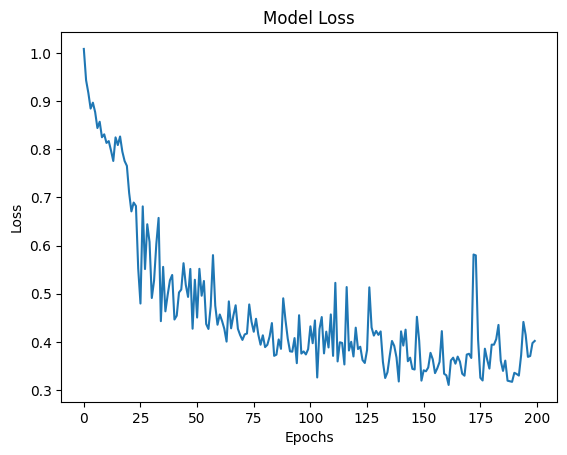

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 입력 변수와 타깃 변수 분리
X = data.drop('미세먼지', axis=1)
y = data['미세먼지']

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GPU 설정
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# 신경망 모델 생성
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 학습 진행 퍼센트를 출력하기 위한 콜백 함수 생성
class ProgressCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1} completed")

# 모델 학습
with tf.device('/GPU:0'):
    history = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0, callbacks=[ProgressCallback()])

# 테스트 데이터에 대한 예측
with tf.device('/GPU:0'):
    y_pred = model.predict(X_test)

# 평가 지표 계산 (MSE, R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("R-squared (R2): {:.3f}".format(r2))

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

9/9 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.5100031742100163
R2 Score: 0.4365252191936042


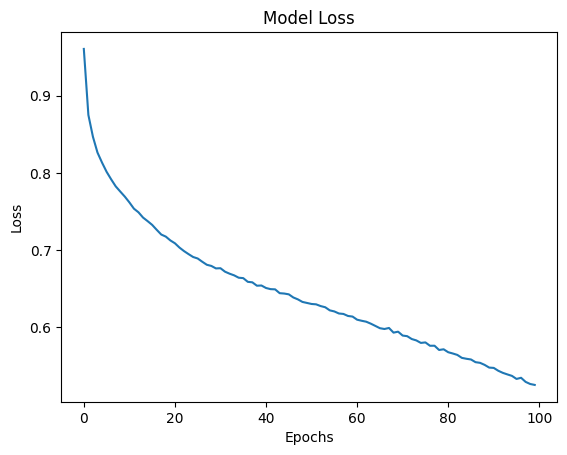

In [21]:
#LSTM
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# 입력 데이터와 타겟 데이터 분리
X = data.drop('미세먼지', axis=1).values
y = data['미세먼지'].values

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LSTM 입력 형태로 변환 (샘플 수, 시퀀스 길이, 특성 수)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[2])))
model.add(Dense(1))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# MSE 계산
mse = mean_squared_error(y_test, y_pred)

# R2 계산
r2 = r2_score(y_test, y_pred)

# 결과 출력
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()